## 決策樹(Decision Tree)
用來處理分類問題的樹狀結構
每個內部節點表示一個評估欄位
每個分枝代表一個可能的欄位輸出結果
每個樹葉節點代表不同分類的類別標記
決策樹的主要功能，是藉由分類已知的Instance(實例，即：訓練範例)來建立一個樹狀結構，並從中歸納出Instance裡、類別欄位與其它欄位間的隱藏規則，所產生出來的決策樹，也能利用來做樣本的預測。

決策樹學習的適用問題
分類問題 (Classification Problem)
核心任務是以規則型式，藉由樹狀結構把範例資料分類到各個可能的對應類別

決策樹（DT）是一種用於分類和迴歸的非參數監督學習方法。 目標是創建一個模型，該模型通過學習從數據特徵推斷出的簡單決策規則來預測目標變數的值。



### 決策樹的優點：

1. 由於可以可視化，易於理解和解釋。
2. 只需要準備很少的數據。其他技術通常需要數據規範化，需要創建虛擬變量並刪除空白值。但是此方法不支持缺少的值。
3. 使用樹的成本（即預測數據）在用於訓練樹的數據點數量上是對數的。
4. 能夠處理數字和分類數據，其他技術通常專用於分析僅具有一種類型的變量的數據集。
5. 能夠處理多輸出問題。
6. 使用白箱模型，如果在模型中可以觀察到給定情況，則可以通過布林邏輯輕鬆解釋條件。相比之下，在黑箱模型中（例如，在人工神經網絡中），結果可能更難以解釋。
7. 可以使用統計測試來驗證模型，這使得考慮模型的可靠性成為可能。
8. 即使生成數據的真實模型在某種程度上違反了它的假設，也可以表現良好。

### 決策樹的缺點：

1. 決策樹學習者可能會創建過於複雜的樹，從而無法很好地概括數據。這稱為過擬合。為避免此問題，必須使用諸如修剪，設置葉節點處所需的最小樣本數或設置樹的最大深度之類的機制。
2. 決策樹可能不穩定，因為數據中的細微變化可能會導致生成完全不同的樹。通過使用集成中的決策樹可以緩解此問題。
3. 在最優性的幾個方面，甚至對於簡單的概念，學習最優決策樹的問題都被認為是NP Complete的。因此，實用的決策樹學習算法基於啟發式演算法（例如貪婪演算法），其中在每個節點上做出局部最優決策。這樣的演算法不能保證返回全局最優決策樹。可以通過在集成學習器中訓練多棵樹來緩解這種情況，在該學習器中，特徵和樣本將通過替換隨機抽樣。
4. 有些概念很難學習，因為決策樹無法輕鬆表達它們，例如XOR，奇偶校驗或多路復用器問題。
5. 如果某些類別占主導地位，則決策樹學習者會創建有偏見的樹。因此，建議在與決策樹擬合之前平衡數據集。

In [1]:
# 導入需要套件與設定參數
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

Automatically created module for IPython interactive environment


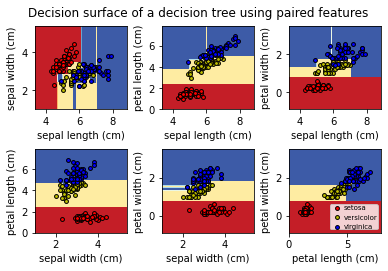

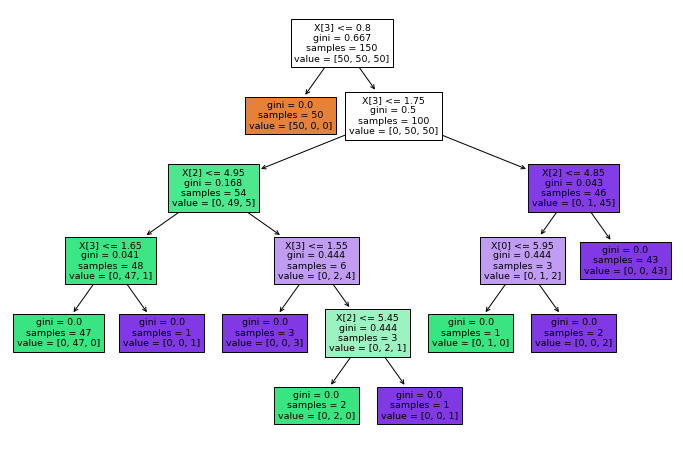

In [2]:
# 載入鳶尾花資料集
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # 我們只採用兩個對應的特徵值
    X = iris.data[:, pair]
    y = iris.target

    # 建立與訓練決策樹模型
    clf = DecisionTreeClassifier().fit(X, y)

    # 畫出決策邊界
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # 畫出訓練點
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0,fontsize='x-small')
plt.axis("tight")

plt.figure(figsize=[12,8])
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()